In [211]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

In [212]:
df = pd.read_csv("train_values.csv")
df.drop("row_id", axis=1, inplace = True)


In [213]:
le = preprocessing.LabelEncoder()
df["co_applicant"]=le.fit_transform(df["co_applicant"])
df["co_applicant"].unique()


array([0, 1])

In [214]:
for i in df.columns:
    df[i] = df[i].replace(-1, np.nan)

In [215]:
df.isnull().sum()

loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                            76982
state_code                        19132
county_code                       20466
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

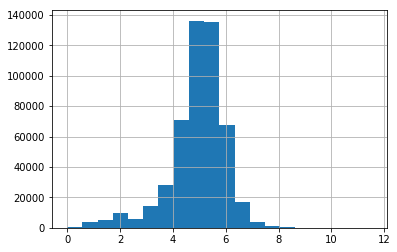

In [216]:
df['LoanAmount_log'] = np.log(df['loan_amount'])
df['LoanAmount_log'].hist(bins=20)

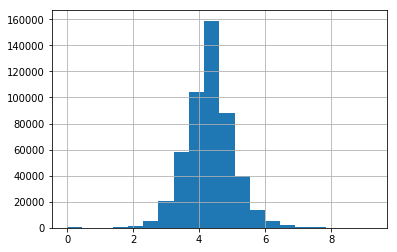

In [217]:
df["applicant_income"] = df["applicant_income"].fillna(df["applicant_income"].sort_values().median())
df['applicant_income_log'] = np.log(df['applicant_income'])
df['applicant_income_log'].hist(bins=20)

In [218]:
df['Capacity%'] = ((df['loan_amount'] / df['applicant_income']) *100).astype(float)

In [219]:
df.isnull().any()

loan_type                         False
property_type                     False
loan_purpose                      False
occupancy                         False
loan_amount                       False
preapproval                       False
msa_md                             True
state_code                         True
county_code                        True
applicant_ethnicity               False
applicant_race                    False
applicant_sex                     False
applicant_income                  False
population                         True
minority_population_pct            True
ffiecmedian_family_income          True
tract_to_msa_md_income_pct         True
number_of_owner-occupied_units     True
number_of_1_to_4_family_units      True
lender                            False
co_applicant                      False
accepted                          False
LoanAmount_log                    False
applicant_income_log              False
Capacity%                         False


In [220]:
df["msa_md"].value_counts()
df["msa_md"] = df["msa_md"].fillna(24)


In [221]:
df["state_code"].value_counts()
df["state_code"] = df["state_code"].fillna(37.0)


In [222]:
df["county_code"].value_counts()
df["county_code"] = df["county_code"].fillna(20.0)

In [224]:
df["population"] = df["population"].fillna(df["population"].sort_values().median())

In [225]:
df["minority_population_pct"].value_counts()
df["minority_population_pct"] = df["minority_population_pct"].fillna(100.000)

In [226]:
df["ffiecmedian_family_income"].value_counts()
df["ffiecmedian_family_income"] = df["ffiecmedian_family_income"].fillna(df["ffiecmedian_family_income"].sort_values().median())

In [227]:
df["tract_to_msa_md_income_pct"].value_counts()
df["tract_to_msa_md_income_pct"] = df["tract_to_msa_md_income_pct"].fillna(100.000)

In [228]:
df["number_of_owner-occupied_units"].value_counts()
df["number_of_owner-occupied_units"] = df["number_of_owner-occupied_units"].fillna(df["number_of_owner-occupied_units"].sort_values().median())

In [229]:
df["number_of_1_to_4_family_units"] = df["number_of_1_to_4_family_units"].fillna(df["number_of_1_to_4_family_units"].sort_values().median())

In [230]:
df.isnull().sum()
df.dtypes

loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                         int64
preapproval                         int64
msa_md                            float64
state_code                        float64
county_code                       float64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                        int64
accepted                            int64
LoanAmount_log                    float64
applicant_income_log              

In [232]:
x = df.drop(['accepted'] , axis = 1)
y = df["accepted"]
#x = preprocessing.StandardScaler().fit(x).transform(x)
x.apply(lambda x: x.corr(y))

loan_type                         0.018589
property_type                    -0.080603
loan_purpose                     -0.131595
occupancy                         0.022043
loan_amount                       0.046370
preapproval                       0.017209
msa_md                            0.073920
state_code                        0.004854
county_code                       0.045159
applicant_ethnicity               0.009777
applicant_race                    0.045361
applicant_sex                    -0.038391
applicant_income                  0.070658
population                        0.025540
minority_population_pct          -0.175627
ffiecmedian_family_income         0.070197
tract_to_msa_md_income_pct        0.064809
number_of_owner-occupied_units    0.040934
number_of_1_to_4_family_units     0.012038
lender                            0.008494
co_applicant                      0.101116
LoanAmount_log                    0.169416
applicant_income_log              0.178756
Capacity%  

In [233]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state= 4)

In [234]:
xl = GradientBoostingClassifier(learning_rate=0.1)
xl.fit(x_train, y_train)
yhat = xl.predict(x_test)
print("accuracy of the model =", accuracy_score(y_test, yhat))

accuracy of the model = 0.6903733333333333
